In [12]:
import xlearn as xl
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
ffm_model = xl.create_ffm()
ffm_model.setTrain("./train_treat.csv")
ffm_model.setValidate("./test_treat.csv")
ffm_model.disableEarlyStop()

# param:
#  0. task: binary classification
#  1. learning rate : 0.2
#  2. regular lambda : 0.002
param = {'task':'binary', 'lr':0.2, 'lambda':0.02, 'fold':5}

ffm_model.fit(param, "./model_treat.out")

# Prediction task
ffm_model.setTest("./X_to_predict.csv")  # Set the path of test dataset
ffm_model.setSigmoid()                 # Convert output to 0-1

# Start to predict
# The output result will be stored in output.txt
ffm_model.predict("./model_treat.out", "./output_treat.txt")

----------------------------------------------------------------------------------------------
           _
          | |
     __  _| |     ___  __ _ _ __ _ __
     \ \/ / |    / _ \/ _` | '__| '_ \ 
      >  <| |___|  __/ (_| | |  | | | |
     /_/\_\_____/\___|\__,_|_|  |_| |_|

        xLearn   -- 0.40 Version --
----------------------------------------------------------------------------------------------

[------------] xLearn uses 4 threads for training task.
[ ACTION     ] Read Problem ...
[------------] First check if the text file has been already converted to binary format.
[------------] Binary file (./train_treat.csv.bin) NOT found. Convert text file to binary file.
[------------] First check if the text file has been already converted to binary format.
[------------] Binary file (./test_treat.csv.bin) NOT found. Convert text file to binary file.
[------------] Number of Feature: 12
[------------] Number of Field: 12
[------------] Time cost for reading problem: 3.10 (sec)
[

In [14]:
ffm_model2 = xl.create_ffm()
ffm_model2.setTrain("./train_control.csv")
ffm_model2.setValidate("./test_control.csv")
ffm_model.disableEarlyStop()

# param:
#  0. task: binary classification
#  1. learning rate : 0.2
#  2. regular lambda : 0.002
param = {'task':'binary', 'lr':0.2, 'lambda':0.02, 'fold':5}

# Train model
ffm_model2.fit(param, "./model_control.out")

# Prediction task
ffm_model2.setTest("./X_to_predict.csv")  # Set the path of test dataset
ffm_model2.setSigmoid()                 # Convert output to 0-1

# Start to predict
# The output result will be stored in output.txt
ffm_model2.predict("./model_control.out", "./output_control.txt")

----------------------------------------------------------------------------------------------
           _
          | |
     __  _| |     ___  __ _ _ __ _ __
     \ \/ / |    / _ \/ _` | '__| '_ \ 
      >  <| |___|  __/ (_| | |  | | | |
     /_/\_\_____/\___|\__,_|_|  |_| |_|

        xLearn   -- 0.40 Version --
----------------------------------------------------------------------------------------------

[------------] xLearn uses 4 threads for training task.
[ ACTION     ] Read Problem ...
[------------] First check if the text file has been already converted to binary format.
[------------] Binary file (./train_control.csv.bin) NOT found. Convert text file to binary file.
[------------] First check if the text file has been already converted to binary format.
[------------] Binary file (./test_control.csv.bin) NOT found. Convert text file to binary file.
[------------] Number of Feature: 12
[------------] Number of Field: 12
[------------] Time cost for reading problem: 0.19 (se

In [24]:
# Read in predictions as a df
import pandas as pd
df_treat = pd.read_csv('output_treat.txt', header=None)
df_control = pd.read_csv('output_control.txt', header=None)

# Predict and get who is treated
est_effect = df_treat - df_control

# Get the xth percentile of the estimated effect
pctile = est_effect.quantile(0.2)
outside_option = 0.0053

treat = (est_effect > pctile) * 1

# Read in ids
X_to_predict_id = pd.read_csv('X_to_predict_id.csv')

df_to_submit = X_to_predict_id
df_to_submit['treat'] = treat
df_to_submit.to_csv("df_to_submit-xlearner.csv.gz", index=False, compression='gzip')
df_to_submit

,id,treat
0,3000001,1
1,3000002,1
2,3000003,0
3,3000004,1
4,3000005,1
...,...,...
1414213,4414214,1
1414214,4414215,0
1414215,4414216,1
1414216,4414217,1


In [25]:
df_to_submit['treat'].value_counts()

treat
1    1124975
0     289243
Name: count, dtype: int64

(array([4.0000e+00, 1.6000e+01, 9.0000e+00, 1.5200e+02, 1.3290e+03,
        1.0190e+03, 8.6830e+03, 7.4970e+03, 6.1840e+03, 2.5020e+03,
        4.0400e+03, 5.0240e+03, 9.7980e+03, 2.0115e+04, 1.2695e+04,
        1.0800e+04, 1.5476e+04, 1.3186e+04, 9.1180e+03, 5.1050e+03,
        1.3162e+04, 1.8140e+04, 5.3733e+04, 8.0490e+04, 1.9069e+04,
        1.5795e+04, 1.3305e+04, 1.3220e+04, 1.5584e+04, 2.0066e+04,
        1.5577e+04, 1.9530e+04, 2.3050e+04, 3.1195e+04, 3.8268e+04,
        3.5713e+04, 4.0052e+04, 4.3411e+04, 4.2744e+04, 3.8162e+04,
        4.4536e+04, 4.8051e+04, 4.1961e+04, 3.7672e+04, 2.9497e+04,
        3.5827e+04, 3.7244e+04, 3.3493e+04, 2.5423e+04, 2.7855e+04,
        2.1523e+04, 2.0736e+04, 1.9933e+04, 2.5275e+04, 1.5732e+04,
        2.1164e+04, 1.2942e+04, 1.4603e+04, 1.4664e+04, 1.3407e+04,
        1.1577e+04, 7.3780e+03, 1.3680e+04, 9.8350e+03, 8.9340e+03,
        1.3044e+04, 6.1930e+03, 1.1197e+04, 4.0020e+03, 1.1727e+04,
        2.8360e+03, 1.1124e+04, 2.3340e+03, 1.00

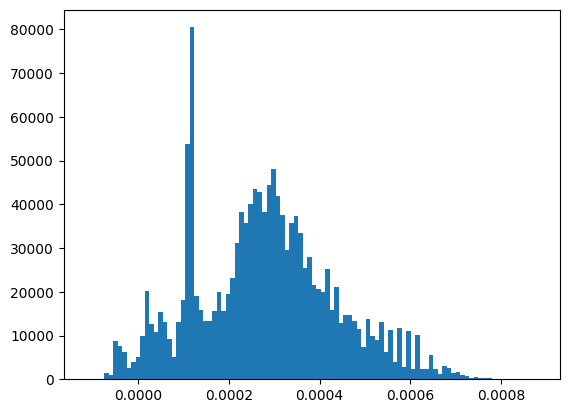

In [26]:
plt.hist(est_effect, bins=100)